**Linear Regression using Scikit-Learn**


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler



np.set_printoptions(precision=2)

In [16]:
def load_house_data():
    data = np.loadtxt("./data/houses.txt", delimiter=',', skiprows=1)
    X = data[:,:4]
    y = data[:,4]
    return X, y

Gradient Descent
Scikit-learn has a gradient descent regression model sklearn.linear_model.SGDRegressor. Like your previous implementation of gradient descent, this model performs best with normalized inputs. sklearn.preprocessing.StandardScaler will perform z-score normalization as in a previous lab. Here it is referred to as 'standard score'.

In [17]:
X_features = ['size(sqft)','bedrooms','floors','age']


Scale/normalize the training data

In [18]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")
print(X_norm.shape)
print(y_train.shape)

Peak to Peak range by column in Raw        X:[2.4e+03 4.0e+00 1.0e+00 9.5e+01]
Peak to Peak range by column in Normalized X:[5.75 6.08 2.05 3.65]
(93, 4)
(99,)


Create and fit the regression model

In [21]:

# Ensure both arrays have the same length
min_len = min(len(X_norm), len(y_train))  # Find the minimum length
X_norm = X_norm[:min_len]  # Trim X_norm
y_train = y_train[:min_len]  # Trim y_train

# Now you can fit the model
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")


SGDRegressor()
number of iterations completed: 139, number of weight updates: 12928.0


In [23]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")


model parameters:                   w: [112.6  -21.5  -33.29 -38.02], b:[365.75]


Make predictions
Predict the targets of the training data. Use both the predict routine and compute using  𝑤 and  𝑏.

In [24]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[295.89 487.46 388.99 493.08]
Target values 
[300.  509.8 394.  540. ]


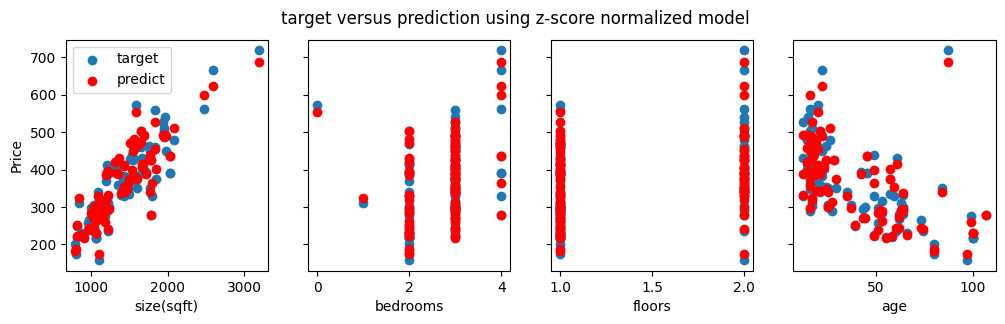

In [26]:
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color='r', label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()